<a href="https://colab.research.google.com/github/Kevinsamuelgitau/Gitau/blob/master/Moringa_Data_Science_Core_W2_Independent_Project_2020_05_Samuel_Gitau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

Here are the datasets used:
Variable Definitions: http://bit.ly/VariableDefinitions (Links to an external site.) 
Dataset: http://bit.ly/FinancialDataset (Links to an external site.) 

# ANALYTIC QUESTION
*italicized text*

1. DATA ANALYTIC QUESTION

How can we predict which individuals use a bank account?


2. METRICS OF SUCCESS



3. CONTEXT



4. EXPERIMENTAL DESIGN

5. DATA RELEVANCE

# IMPORTING LIBRARIES


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


LOADING DATASETS

In [23]:
# Dataset url: : http://bit.ly/FinancialDataset 
# To load our dataset
with open("Financial Dataset - 1.csv",'r')as f:
  finances = pd.read_csv(f, encoding= 'utf')
# to preview dataset
finances.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# DATA EXPLORATION

In [24]:
# To check the number of records
finances.shape


(23524, 13)

In [25]:
# To check datatypes from our data
finances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


# EXTERNAL DATA SOURCE VALIDATION

# DATA CLEANING

In [26]:
# First, to rename the columns to make analysis easier
finances.columns = ['Country','Year','ID', 'Bank account', 'Location','Phone', 'Householdsize', 'Age','Gender', 'Househierachy', 'Status','Educuation', 'Jobtype']
# And to preview new column names
finances.head()

,Country,Year,ID,Bank account,Location,Phone,Householdsize,Age,Gender,Househierachy,Status,Educuation,Jobtype
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [27]:
#To remove white spaces in our columns
finances.columns.str.replace(" "," ")
# And make column names uniform
finances.columns = finances.columns.str.strip().str.upper()
finances['COUNTRY'] = finances['COUNTRY'].str.replace(' ',' ').str.lower()
finances['ID'] = finances['ID'].str.replace(' ',' ').str.lower()
finances['BANK ACCOUNT'] = finances['BANK ACCOUNT'].str.replace(' ',' ').str.lower()
finances['LOCATION']= finances['LOCATION'].str.replace(' ',' ').str.lower()
finances['PHONE'] = finances['PHONE'].str.replace(' ',' ').str.lower()
finances['GENDER']= finances['GENDER'].str.replace(' ',' ').str.lower()
finances['HOUSEHIERACHY'] = finances['HOUSEHIERACHY'].str.replace(' ',' ').str.lower() 
finances['STATUS'] = finances['STATUS'].str.replace(' ',' ').str.lower() 
finances['EDUCUATION'] = finances['EDUCUATION'].str.replace(' ',' ').str.lower() 
finances['JOBTYPE'] = finances['JOBTYPE'].str.replace(' ',' ').str.lower() 
finances.head()

,COUNTRY,YEAR,ID,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,uniqueid_1,yes,rural,yes,3.0,24.0,female,spouse,married/living together,secondary education,self employed
1,kenya,2018,uniqueid_2,no,rural,no,5.0,70.0,female,head of household,widowed,no formal education,government dependent
2,kenya,2018,uniqueid_3,yes,urban,yes,5.0,26.0,male,other relative,single/never married,vocational/specialised training,self employed
3,kenya,2018,uniqueid_4,no,rural,yes,5.0,34.0,female,head of household,married/living together,primary education,formally employed private
4,kenya,2018,uniqueid_5,no,urban,no,8.0,26.0,male,child,single/never married,primary education,informally employed


In [0]:
#Dropping columns that we don't need in analysis

finances.drop('ID',axis=1,inplace= True)


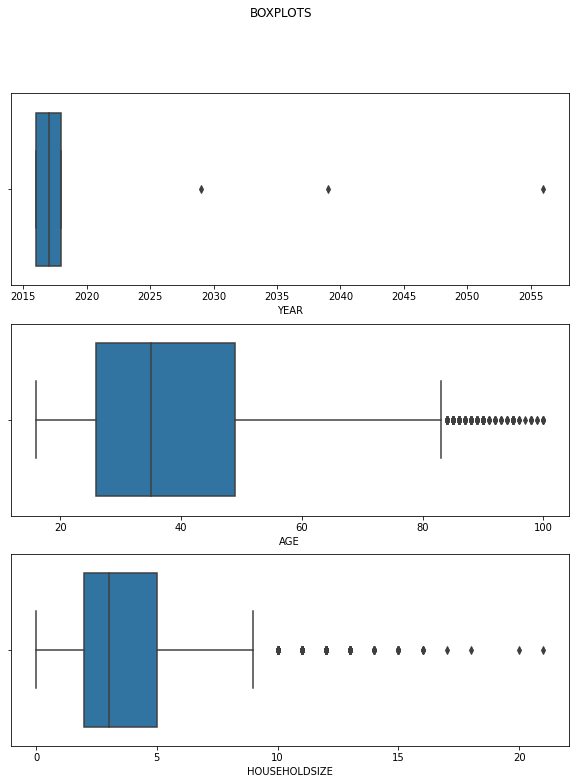

In [29]:
# To check for outliers in categorical variables through boxplots
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,12))

fig.suptitle('BOXPLOTS')

sns.boxplot(finances['YEAR'], ax= ax1, orient = 'h')
sns.boxplot(finances['AGE'],ax = ax2, orient = 'h')
sns.boxplot(finances['HOUSEHOLDSIZE'], ax = ax3, orient = 'h')
plt.show()

In [30]:
# To remove outliers
finances = finances[finances['YEAR'] <= 2018]
finances['YEAR'].unique()

array([2018, 2016, 2017])

In [31]:
# To check for missing numerical data

finances.isnull().sum()

COUNTRY          14
YEAR              0
BANK ACCOUNT     36
LOCATION         15
PHONE            11
HOUSEHOLDSIZE    28
AGE              34
GENDER           34
HOUSEHIERACHY     4
STATUS           32
EDUCUATION       29
JOBTYPE          30
dtype: int64

In [32]:
# And removing missing data


finances.dropna(axis=0, how = 'any', inplace = True)
finances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23340 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COUNTRY        23340 non-null  object 
 1   YEAR           23340 non-null  int64  
 2   BANK ACCOUNT   23340 non-null  object 
 3   LOCATION       23340 non-null  object 
 4   PHONE          23340 non-null  object 
 5   HOUSEHOLDSIZE  23340 non-null  float64
 6   AGE            23340 non-null  float64
 7   GENDER         23340 non-null  object 
 8   HOUSEHIERACHY  23340 non-null  object 
 9   STATUS         23340 non-null  object 
 10  EDUCUATION     23340 non-null  object 
 11  JOBTYPE        23340 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.3+ MB


In [33]:
# To confirm there are no anomalies left
finances.describe()


,YEAR,HOUSEHOLDSIZE,AGE
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [34]:
finances.head()

,COUNTRY,YEAR,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,yes,rural,yes,3.0,24.0,female,spouse,married/living together,secondary education,self employed
1,kenya,2018,no,rural,no,5.0,70.0,female,head of household,widowed,no formal education,government dependent
2,kenya,2018,yes,urban,yes,5.0,26.0,male,other relative,single/never married,vocational/specialised training,self employed
3,kenya,2018,no,rural,yes,5.0,34.0,female,head of household,married/living together,primary education,formally employed private
4,kenya,2018,no,urban,no,8.0,26.0,male,child,single/never married,primary education,informally employed


# EXPLORATORY DATA ANALYSIS

UNIVARIATE ANALYSIS

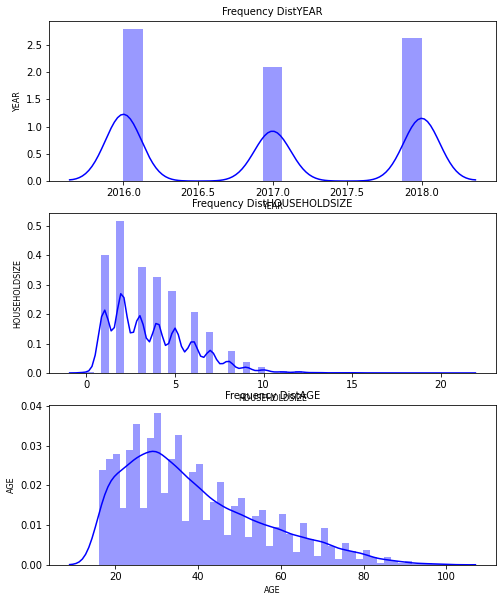

In [35]:
# To plot the univariate summaries 
columns = ['YEAR', 'HOUSEHOLDSIZE', 'AGE']

fig, ax = plt.subplots(len(columns), figsize=(8,10))

for i, col_val in enumerate(columns):
  sns.distplot(finances[col_val], hist=True, ax=ax[i], color='blue')
  ax[i].set_title('Frequency Dist' + col_val, fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)
  ax[i].set_ylabel(col_val, fontsize=8)

plt.show()

In [36]:
# measure of central tendancy for categorical data
finances_mode =finances[['COUNTRY', 'YEAR', 'BANK ACCOUNT', 'LOCATION', 'PHONE', 'GENDER', 'HOUSEHIERACHY', 'STATUS','EDUCUATION', 'JOBTYPE']].mode()
finances_mode.T

,0
COUNTRY,rwanda
YEAR,2016
BANK ACCOUNT,no
LOCATION,rural
PHONE,yes
GENDER,female
HOUSEHIERACHY,head of household
STATUS,married/living together
EDUCUATION,primary education
JOBTYPE,self employed


In [37]:
# measure of Central Tendancy for numerical data
finances.describe()
# 25% is the first quatile
# 50% is the median
# 75% is the third quatile
# std is the standard deviation

,YEAR,HOUSEHOLDSIZE,AGE
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [39]:
# interquartile age range
q1_AGE,q3_AGE = np.percentile(finances['AGE'],[25,75])
iqr_AGE = q3_AGE - q1_AGE
print('THE AGE INTERQUATILE RANGE IS',iqr_AGE)
# confidence interval
l_bound_AGE = q1_AGE - (1.5*iqr_AGE)
u_bound_AGE = q3_AGE + (1.5*iqr_AGE)
print('Confidence interval is =',u_bound_AGE,'--',l_bound_AGE )
print('\n')

# interquartile range householdsize
q1_HOUSEHOLDSIZE,q3_HOUSEHOLDSIZE = np.percentile(finances['HOUSEHOLDSIZE'],[25,75])
iqr_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE - q1_HOUSEHOLDSIZE
print('THE HOUSEHOLDSIZE INTERQUATILE RANGE IS',iqr_HOUSEHOLDSIZE)
# confidence interval
l_bound_HOUSEHOLDSIZE = q1_HOUSEHOLDSIZE - (1.5*iqr_HOUSEHOLDSIZE)
u_bound_HOUSEHOLDSIZE = q3_HOUSEHOLDSIZE + (1.5*iqr_HOUSEHOLDSIZE)
print('Confidence interval is =',u_bound_HOUSEHOLDSIZE,'--',l_bound_HOUSEHOLDSIZE)

THE AGE INTERQUATILE RANGE IS 23.0
Confidence interval is = 83.5 -- -8.5


THE HOUSEHOLDSIZE INTERQUATILE RANGE IS 3.0
Confidence interval is = 9.5 -- -2.5


In [40]:
# to find range
print("HOUSEHOLDSIZE RANGE IS =",finances['HOUSEHOLDSIZE'].max()-finances['HOUSEHOLDSIZE'].min())

HOUSEHOLDSIZE RANGE IS = 21.0


[Text(0, 0, 'self employed'),
 Text(0, 0, 'government dependent'),
 Text(0, 0, 'formally employed private'),
 Text(0, 0, 'informally employed'),
 Text(0, 0, 'formally employed government'),
 Text(0, 0, 'farming and fishing'),
 Text(0, 0, 'remittance dependent'),
 Text(0, 0, 'other income'),
 Text(0, 0, 'dont know/refuse to answer'),
 Text(0, 0, 'no income')]

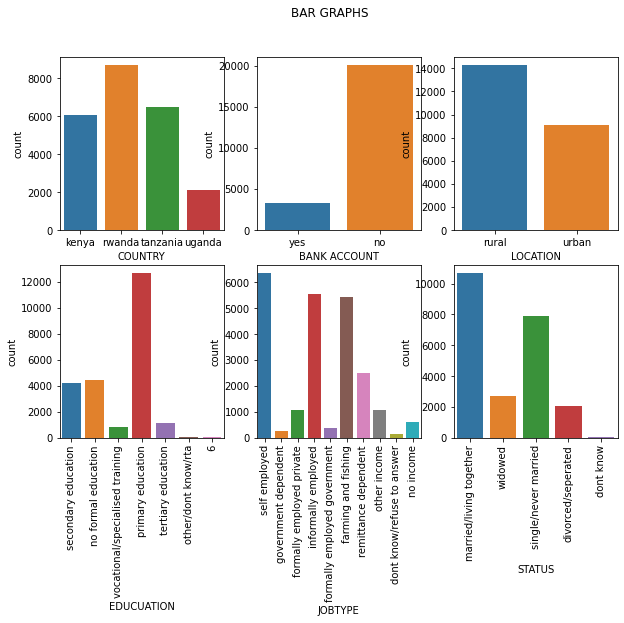

In [41]:
# To visualize numerical data
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (10,7))

plt.suptitle('BAR GRAPHS')

plt.xticks(rotation=90)
sns.countplot(finances.COUNTRY, ax=ax1)
sns.countplot(finances['BANK ACCOUNT'], ax=ax2)
sns.countplot(finances['LOCATION'], ax=ax3)

EDUCUATION = sns.countplot(finances['EDUCUATION'], ax=ax4)
EDUCUATION.set_xticklabels(EDUCUATION.get_xticklabels(),rotation = 90)

STATUS=sns.countplot(finances['STATUS'], ax=ax6)

JOBTYPE=sns.countplot(finances['JOBTYPE'], ax=ax5)
JOBTYPE.set_xticklabels(JOBTYPE.get_xticklabels(),rotation = 90)



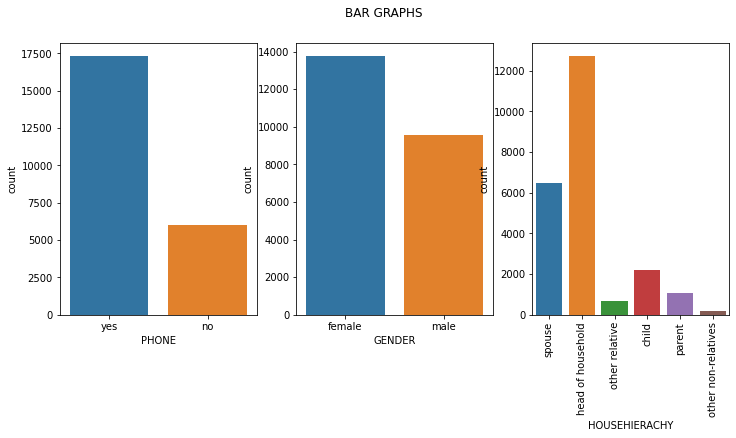

In [42]:
# To visualize categorical data

fig, (ax4,ax5,ax6) = plt.subplots(1,3,figsize = (12,5))
plt.suptitle('BAR GRAPHS')
plt.xticks(rotation=90)
sns.countplot(finances['PHONE'], ax=ax4)
sns.countplot(finances['GENDER'], ax=ax5)
sns.countplot(finances['HOUSEHIERACHY'], ax=ax6)

In [43]:
#To check for skewness
print("HOUSEHOLD SIZE SKEWNESS = ",finances['HOUSEHOLDSIZE'].skew())
print("HOUSEHOLD SIZE KURTOSIS = ",finances['HOUSEHOLDSIZE'].kurt())
print('\n')
print("AGE SKEWNESS = ",finances['AGE'].skew())
print("AGE KURTOSIS = ",finances['AGE'].kurt())

HOUSEHOLD SIZE SKEWNESS =  0.9741827150450616
HOUSEHOLD SIZE KURTOSIS =  1.1538357462528523


AGE SKEWNESS =  0.8406145812311228
AGE KURTOSIS =  0.09826807013177241


In [44]:
#  Frequency tables for categorical variables
print('COUNTRY')
print(finances.COUNTRY.value_counts())
print("\n")
print('YEAR')
print(finances['YEAR'].value_counts())
print("\n")
print('BANK ACCOUNT ACCESS')
print(finances['BANK ACCOUNT'].value_counts())
print("\n")
print('RESPONDENTS LOCATION')
print(finances['LOCATION'].value_counts())
print("\n")
print('CELLPHONE ACCESS')
print(finances['PHONE'].value_counts())
print("\n")
print('RESPONDENTS GENDER')
print(finances['GENDER'].value_counts())
print("\n")
print('RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD')
print(finances['HOUSEHIERACHY'].value_counts())
print("\n")
print('MARITAL STATUS')
print(finances['STATUS'].value_counts())
print("\n")
print('EDUCATION LEVEL')
print(finances['EDUCUATION'].value_counts())
print("\n")
print('JOBTYPE')
print(finances['JOBTYPE'].value_counts())

COUNTRY
rwanda      8683
tanzania    6500
kenya       6062
uganda      2095
Name: COUNTRY, dtype: int64


YEAR
2016    8683
2018    8157
2017    6500
Name: YEAR, dtype: int64


BANK ACCOUNT ACCESS
no     20044
yes     3296
Name: BANK ACCOUNT, dtype: int64


RESPONDENTS LOCATION
rural    14263
urban     9077
Name: LOCATION, dtype: int64


CELLPHONE ACCESS
yes    17331
no      6009
Name: PHONE, dtype: int64


RESPONDENTS GENDER
female    13766
male       9574
Name: GENDER, dtype: int64


RESPONDENT RELATIONSHIP RELATION WITH HOUSEHEAD
head of household      12729
spouse                  6470
child                   2221
parent                  1069
other relative           662
other non-relatives      189
Name: HOUSEHIERACHY, dtype: int64


MARITAL STATUS
married/living together    10698
single/never married        7902
widowed                     2683
divorced/seperated          2049
dont know                      8
Name: STATUS, dtype: int64


EDUCATION LEVEL
primary education         

BIVARIATE ANALYSIS

In [0]:
# First, import our libraries
!pip install researchpy
import researchpy as rp

In [45]:
# To analyse numeric data
print('AGE ANALYSIS PER COUNTRY')
print(round(rp.summary_cont(finances.groupby(['COUNTRY'])['AGE'])))
print('\n')
print('HOUSEHOLDSIZE ANALYSIS PER COUNTRY')
print(round(rp.summary_cont(finances.groupby(['COUNTRY'])['HOUSEHOLDSIZE'])))

AGE ANALYSIS PER COUNTRY


             N  Mean    SD   SE  95% Conf.  Interval
COUNTRY                                             
kenya     6062  40.0  17.0  0.0       39.0      40.0
rwanda    8683  39.0  16.0  0.0       39.0      40.0
tanzania  6500  38.0  16.0  0.0       38.0      39.0
uganda    2095  35.0  15.0  0.0       35.0      36.0


HOUSEHOLDSIZE ANALYSIS PER COUNTRY


             N  Mean   SD   SE  95% Conf.  Interval
COUNTRY                                            
kenya     6062   4.0  2.0  0.0        4.0       4.0
rwanda    8683   4.0  2.0  0.0        4.0       5.0
tanzania  6500   2.0  1.0  0.0        2.0       2.0
uganda    2095   5.0  3.0  0.0        5.0       5.0


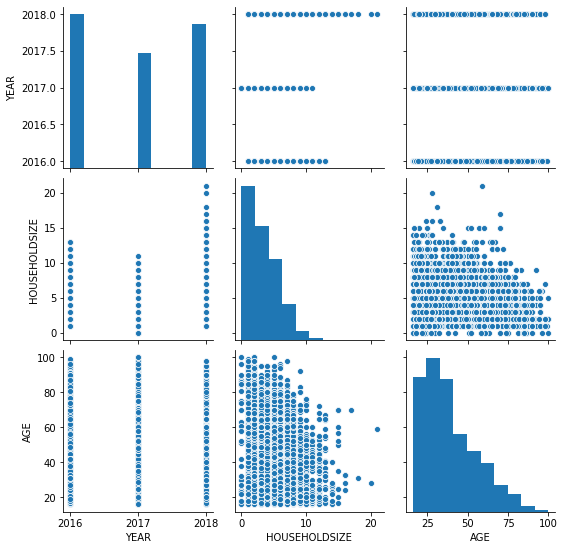

In [46]:
# Ploting the bivariate summaries
sns.pairplot(finances)
plt.show()

Text(0.5, 1.0, 'HOUSEHOLD SIZE AND AGE SCATTER PLOT')

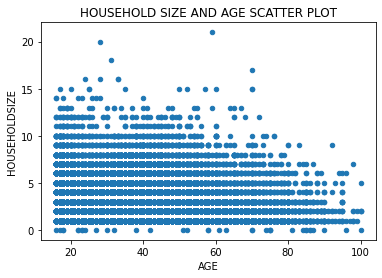

In [47]:
# To visualize gender against access to bank account
finances.plot(x= 'AGE', y= 'HOUSEHOLDSIZE', kind = "scatter")
plt.title("HOUSEHOLD SIZE AND AGE SCATTER PLOT")


Text(0, 0.5, 'PEOPLE COUNT')

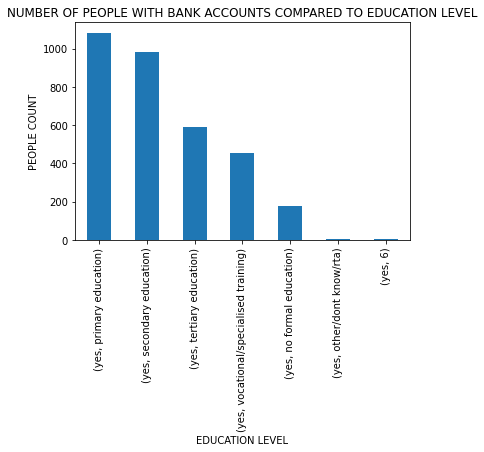

In [48]:
# To check the number of people with bank accounts compared to their education level
education = finances[finances['BANK ACCOUNT']=='yes']
education = education.groupby(['BANK ACCOUNT'])['EDUCUATION'].value_counts().plot(kind = "bar")
plt.xticks(rotation = 90)
plt.title('NUMBER OF PEOPLE WITH BANK ACCOUNTS COMPARED TO EDUCATION LEVEL')
plt.xlabel('EDUCATION LEVEL')
plt.ylabel('PEOPLE COUNT')

# Bank account ownership increases with increase in level of education

Text(0, 0.5, 'PEOPLE COUNT')

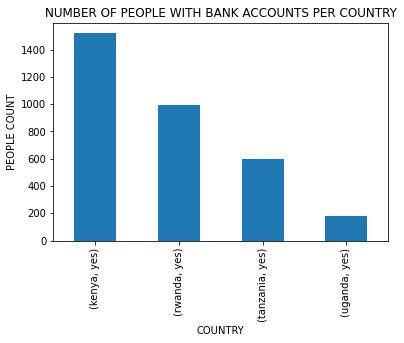

In [49]:
# To visualize the number of people with bank accounts per country
countries = finances[finances['BANK ACCOUNT']=='yes']
countries = countries.groupby(['COUNTRY'])['BANK ACCOUNT'].value_counts()
countries.plot(kind = 'bar',stacked = True)
plt.title('NUMBER OF PEOPLE WITH BANK ACCOUNTS PER COUNTRY')
plt.xlabel('COUNTRY')
plt.ylabel('PEOPLE COUNT')
# Kenya has the highest number of people with bank accounts

Text(0, 0.5, 'PEOPLE COUNT')

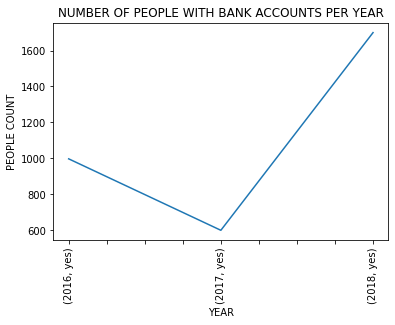

In [50]:
# to check trend of bank accounts ownership over time

time = finances[finances['BANK ACCOUNT']=='yes']
time = time.groupby(['YEAR'])['BANK ACCOUNT'].value_counts().plot(kind = "line")
plt.xticks(rotation = 90)
plt.title('NUMBER OF PEOPLE WITH BANK ACCOUNTS PER YEAR')
plt.xlabel('YEAR')
plt.ylabel('PEOPLE COUNT')
# bank account ownership has increased over time from 2017

In [51]:
#To convert categorical data To numerical
df = finances

from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()

df['BANK ACCOUNT']= Encoder.fit_transform(df['BANK ACCOUNT'])
df['PHONE']= Encoder.fit_transform(df['PHONE'])
df['HOUSEHOLDSIZE']= Encoder.fit_transform(df['HOUSEHOLDSIZE'])
df['AGE']= Encoder.fit_transform(df['AGE'])
df['GENDER']= Encoder.fit_transform(df['GENDER'])
df['HOUSEHIERACHY']= Encoder.fit_transform(df['HOUSEHIERACHY'])
df['STATUS']= Encoder.fit_transform(df['STATUS'])
df['EDUCUATION']= Encoder.fit_transform(df['EDUCUATION'])
df['LOCATION']= Encoder.fit_transform(df['LOCATION'])
df['JOBTYPE']= Encoder.fit_transform(df['JOBTYPE'])


# and to confirm
df.nunique()

COUNTRY           4
YEAR              3
BANK ACCOUNT      2
LOCATION          2
PHONE             2
HOUSEHOLDSIZE    21
AGE              85
GENDER            2
HOUSEHIERACHY     6
STATUS            5
EDUCUATION        7
JOBTYPE          10
dtype: int64

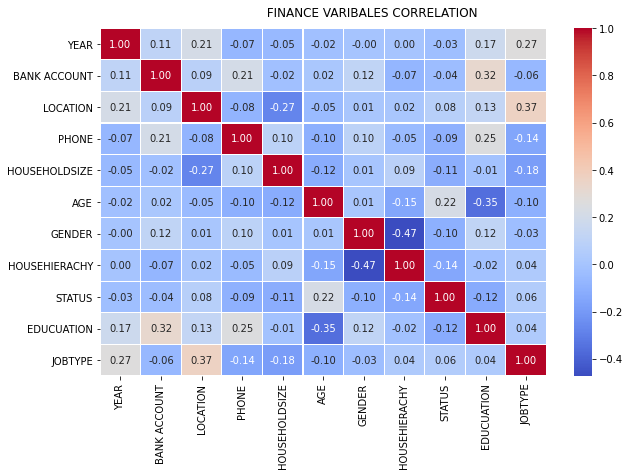

In [52]:
# To visualize correlation between factors
f , ax = plt.subplots(figsize = (10,6))
corr = df.corr()
cor = sns.heatmap(corr, annot = True, ax =ax , cmap = "coolwarm", fmt = '.2f',linewidths= .05)
f.subplots_adjust(top =0.93)
t = f.suptitle(' FINANCE VARIBALES CORRELATION')

In [53]:
# for Pearsons Coefficient
persons_phone = df['BANK ACCOUNT'].corr(df['PHONE'], method='pearson')
print(persons_phone)
# The data has moderately positive correlation

0.2095118918266013


MULTIVARIATE ANALYSIS

Principal component analysis

In [91]:
# To load our dataset
finances.head()

,COUNTRY,YEAR,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,1,0,1,3,8,0,5,2,4,9
1,kenya,2018,0,0,0,5,54,0,1,4,1,4
2,kenya,2018,1,1,1,5,10,1,3,3,6,9
3,kenya,2018,0,0,1,5,18,0,1,2,3,3
4,kenya,2018,0,1,0,8,10,1,0,3,3,5


In [0]:
# Preprocessing
X = df.drop('BANK ACCOUNT', 1)
y = df['BANK ACCOUNT']

In [0]:
X = df.drop('COUNTRY', 1)
y = df['COUNTRY']

In [0]:
# Splitting into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [69]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.16588233, 0.16202075, 0.14295584, 0.09876291, 0.08428713,
       0.07843164, 0.0667471 , 0.06284873, 0.05277825, 0.04387468,
       0.04141065])

In [0]:
# Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [72]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 356  322  536    0]
 [  58 1275  443    0]
 [ 205  257  811    0]
 [  77   85  243    0]]
Accuracy 0.5231362467866324


In [0]:
# Results with 2 Principal Components
#
from sklearn.decomposition import PCA

pca = PCA(n_components=0.5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# With three principal components the classification accuracy should again increase to 93.33%
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [75]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[ 157  643  414    0]
 [  16 1697   63    0]
 [  64  243  966    0]
 [  87  146  172    0]]
Accuracy 0.6041131105398457


Our accuracy is 60%

LDA

In [96]:
# To preview our dataset
finances.head()

,COUNTRY,YEAR,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY,STATUS,EDUCUATION,JOBTYPE
0,kenya,2018,1,0,1,3,8,0,5,2,4,9
1,kenya,2018,0,0,0,5,54,0,1,4,1,4
2,kenya,2018,1,1,1,5,10,1,3,3,6,9
3,kenya,2018,0,0,1,5,18,0,1,2,3,3
4,kenya,2018,0,1,0,8,10,1,0,3,3,5


In [0]:
# Dropping unecessary columns
df.drop(["COUNTRY", "YEAR", "STATUS", "EDUCUATION", "JOBTYPE"],axis=1,inplace=True)

In [99]:
# Dropping null values
df.dropna(inplace=True)
# Checking for null values
df.isnull().values.any()

False

In [0]:
X = df.drop('BANK ACCOUNT', 1)
y = df['BANK ACCOUNT']

In [0]:
# divide data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [0]:
# Training and Making Predictions


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [104]:
# Evaluate performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[4036    0]
 [ 632    0]]
Accuracy0.8646101113967438


Accuracy is 86.46%.

FACTOR ANALYSIS

In [109]:
# Installing factor analyzer 
pip install factor-analyzer==0.3.2

     |████████████████████████████████| 40kB 2.3MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=0b09043b1e84df0abebac1919f7a0b14f59ace825ebb300e0a6ed9c0340cc8d7
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [110]:
# To preview our dataset
finances.head()

,BANK ACCOUNT,LOCATION,PHONE,HOUSEHOLDSIZE,AGE,GENDER,HOUSEHIERACHY
0,1,0,1,3,8,0,5
1,0,0,0,5,54,0,1
2,1,1,1,5,10,1,3
3,0,0,1,5,18,0,1
4,0,1,0,8,10,1,0


In [0]:
# Dropping unecessary columns
df.drop(["BANK ACCOUNT", "HOUSEHIERACHY"],axis=1,inplace=True)

In [112]:
# Adequacy test
# - Bartlett’s Test

# Installing factor analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value
# the p-value is 0, so test was statistically significant, 
#  observed correlation matrix is not an identity matrix.

(3143.1677774556165, 0.0)

In [113]:
# - Kaiser-Meyer-Olkin Test
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df)
kmo_all,kmo_model
# values are less than 0.6 hence they are  inadequate

(array([0.48350045, 0.55721906, 0.50351553, 0.43134027, 0.46670542]),
 0.4934198057481073)

In [120]:
# Choosing the Number of Factors

# Creating factor analysis object and perform factor analysis
# fa = FactorAnalyzer()
factor_analyzer.analyze(finances,5 , rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev
# We will take the first three factors as their eigenvalues are greater than one

NameError: ignored